## Normal Probability Plot

In [1]:
# -*- coding: utf-8 -*-
"""
Normal Probability Plot Generation
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Assuming you have a dataset of birth weights called 'birth_weights'
# For demonstration purposes, we'll create a sample dataset
np.random.seed(42)  # For reproducibility
mu, sigma = 7.5, 1.5  # Example mean and standard deviation
birth_weights = np.random.normal(mu, sigma, 100)

In [3]:
# Step 1: Sort the values in the sample
sorted_birth_weights = np.sort(birth_weights)

In [4]:
# Step 2: Generate a random sample from a standard normal distribution
# with the same size as the sample, and sort it.
standard_normal_sample = np.random.normal(0, 1, len(birth_weights))
sorted_standard_normal = np.sort(standard_normal_sample)

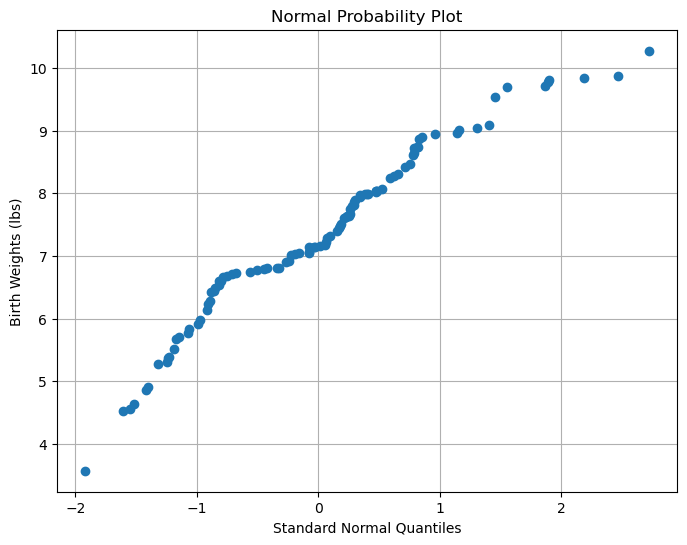

In [5]:
# Step 3: Plot the sorted values from the sample versus the random values.
plt.figure(figsize=(8, 6))
plt.plot(sorted_standard_normal, sorted_birth_weights, 'o')
plt.xlabel('Standard Normal Quantiles')
plt.ylabel('Birth Weights (lbs)')
plt.title('Normal Probability Plot')
plt.grid(True)
plt.show()

In [6]:
#CDF Plot
def plot_cdf(data, model_mean, model_std):
    """Plots the CDF of the data and a normal model."""
    sorted_data = np.sort(data)
    cdf_data = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    model_cdf = stats.norm.cdf(sorted_data, loc=model_mean, scale=model_std)
    
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf_data, label='data')
    plt.plot(sorted_data, model_cdf, label='model')
    plt.xlabel('birth weight (lbs)')
    plt.ylabel('CDF')
    plt.title('Birth weights')
    plt.legend()
    plt.show()

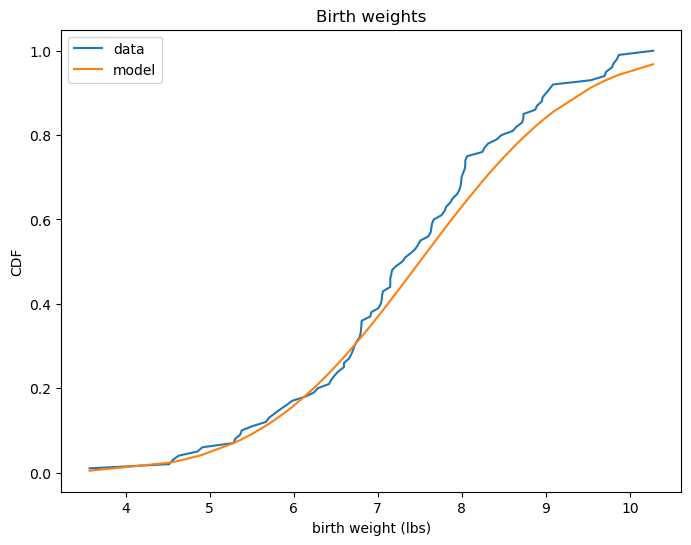

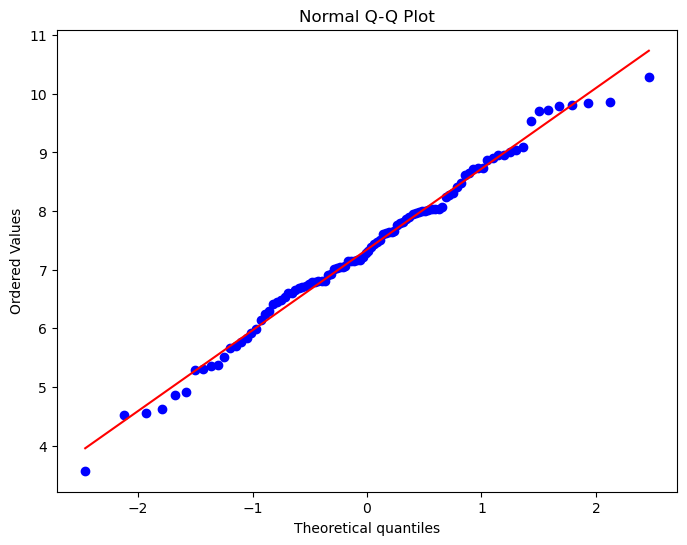

In [7]:
plot_cdf(birth_weights, mu, sigma)

#Using scipy.stats.probplot for a quicker normal probability plot
plt.figure(figsize=(8, 6))
stats.probplot(birth_weights, plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()